In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,Imputer
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
import seaborn as sns

# Lets load the Automobile data to the dataframe

In [2]:
df=pd.read_csv("C:/Users/DELL/Downloads/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Here i seperated carname with carname and model name

In [3]:
new=df['CarName'].str.split(" ",n=1,expand=True)
df['car_name']=new[0]
df['model_name']=new[1]
df.drop(columns=['CarName'],inplace=True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name,model_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


# Delete model name column

In [4]:
df.drop(columns=['model_name'],inplace=True)

In [5]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Check the skewness of numerical variable and apply the square root transformation on variable 

In [6]:
numeric_feature_auto = df._get_numeric_data().columns
for feature in numeric_feature_auto:
    if skew(df[feature])>1:
        df[feature] = np.sqrt(df[feature])

In [7]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name
0,1,3,gas,std,two,convertible,rwd,front,9.412757,168.8,...,mpfi,3.47,2.68,3.000000,10.535654,5000,21,27,116.167982,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,9.412757,168.8,...,mpfi,3.47,2.68,3.000000,10.535654,5000,21,27,128.452326,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,9.721111,171.2,...,mpfi,2.68,3.47,3.000000,12.409674,5000,19,26,128.452326,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,9.989995,176.6,...,mpfi,3.19,3.40,3.162278,10.099505,5500,24,30,118.110118,audi
4,5,2,gas,std,four,sedan,4wd,front,9.969955,176.6,...,mpfi,3.19,3.40,2.828427,10.723805,5500,18,22,132.098448,audi


# Label Encode the categorical variable

In [8]:

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
df = dummyEncode(df)

In [9]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name
0,1,3,1,0,1,0,2,0,9.412757,168.8,...,5,3.47,2.68,3.000000,10.535654,5000,21,27,116.167982,1
1,2,3,1,0,1,0,2,0,9.412757,168.8,...,5,3.47,2.68,3.000000,10.535654,5000,21,27,128.452326,1
2,3,1,1,0,1,2,2,0,9.721111,171.2,...,5,2.68,3.47,3.000000,12.409674,5000,19,26,128.452326,1
3,4,2,1,0,0,3,1,0,9.989995,176.6,...,5,3.19,3.40,3.162278,10.099505,5500,24,30,118.110118,2
4,5,2,1,0,0,3,0,0,9.969955,176.6,...,5,3.19,3.40,2.828427,10.723805,5500,18,22,132.098448,2


# Combine height and width to create new feature Area

In [10]:
df['area'] = df['carheight'] * df['carwidth']

In [11]:
df1=df.drop(columns=['carheight','carwidth'])

In [12]:
df1.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name,area
0,1,3,1,0,1,0,2,0,9.412757,168.8,...,3.47,2.68,3.000000,10.535654,5000,21,27,116.167982,1,3128.08
1,2,3,1,0,1,0,2,0,9.412757,168.8,...,3.47,2.68,3.000000,10.535654,5000,21,27,128.452326,1,3128.08
2,3,1,1,0,1,2,2,0,9.721111,171.2,...,2.68,3.47,3.000000,12.409674,5000,19,26,128.452326,1,3432.20
3,4,2,1,0,0,3,1,0,9.989995,176.6,...,3.19,3.40,3.162278,10.099505,5500,24,30,118.110118,2,3594.66
4,5,2,1,0,0,3,0,0,9.969955,176.6,...,3.19,3.40,2.828427,10.723805,5500,18,22,132.098448,2,3605.52


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int32
aspiration          205 non-null int32
doornumber          205 non-null int32
carbody             205 non-null int32
drivewheel          205 non-null int32
enginelocation      205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null int32
cylindernumber      205 non-null int32
enginesize          205 non-null float64
fuelsystem          205 non-null int32
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null float64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205

In [14]:
df1.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name,area
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,9.933165,174.049268,...,3.329756,3.255415,3.141676,10.042623,5125.121951,25.219512,30.751220,111.120840,14.468293,3542.345220
std,59.322565,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,0.298752,12.337289,...,0.270844,0.313597,0.523206,1.810743,476.985643,6.542142,6.886443,30.551968,7.486931,224.009117
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.305912,141.100000,...,2.540000,2.070000,2.645751,6.928203,4150.000000,13.000000,16.000000,71.540198,0.000000,3128.080000
25%,52.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,9.721111,166.300000,...,3.150000,3.110000,2.932576,8.366600,4800.000000,19.000000,25.000000,88.249646,7.000000,3374.630000
50%,103.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,9.848858,173.200000,...,3.310000,3.290000,3.000000,9.746794,5200.000000,24.000000,30.000000,101.464279,14.000000,3488.000000
75%,154.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,10.119289,183.100000,...,3.580000,3.410000,3.065942,10.770330,5500.000000,30.000000,34.000000,128.464003,22.000000,3690.750000
max,205.000000,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,10.995454,208.100000,...,3.940000,4.170000,4.795832,16.970563,6600.000000,49.000000,54.000000,213.072758,27.000000,4126.610000


C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


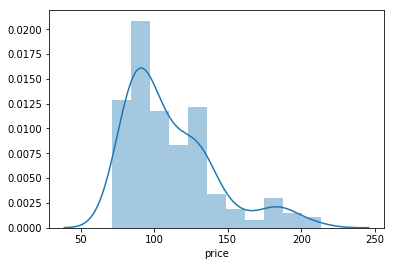

In [15]:
sns.distplot(df1['price'])

# Lets check the different car makers

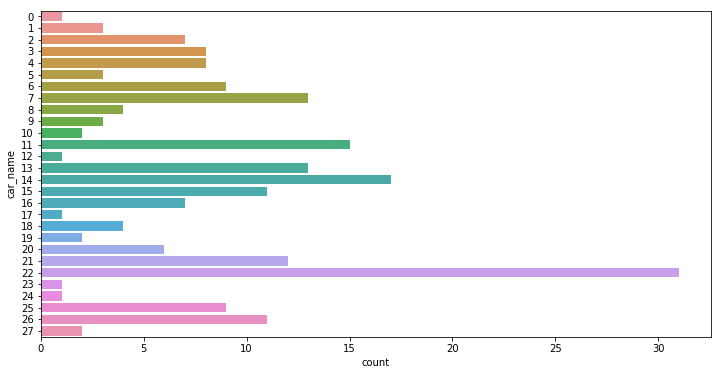

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(y='car_name',data=df1)

# Plot a joint plot to see the relationship between horsepower and price

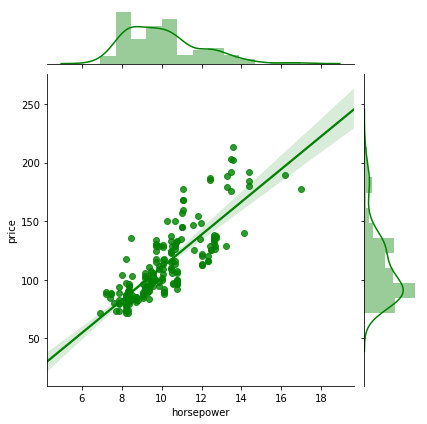

In [17]:
sns.jointplot('horsepower','price',data=df1,kind='reg',color="g")

# plot a boxplot to show the variability of each carbody with respect to price

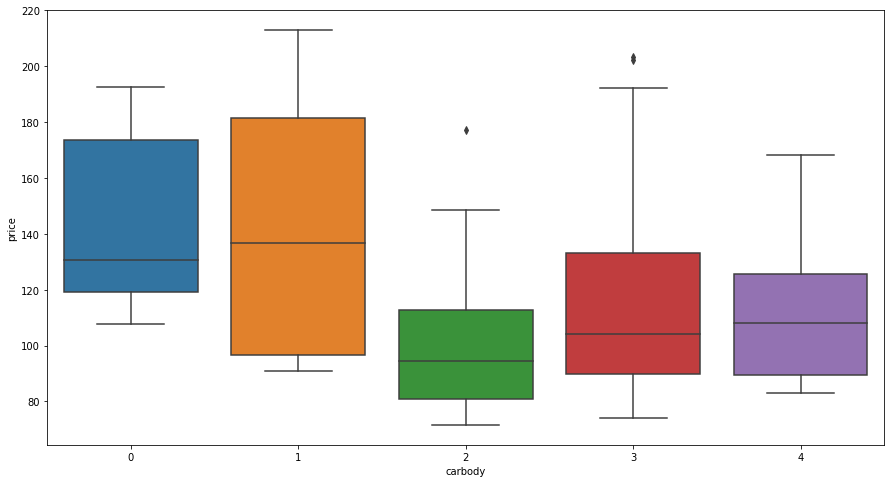

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot('carbody','price',data=df1)

# import train and test to split the data in train data and test data

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df1,train_size=0.7,test_size=0.3,random_state=100)

# Apply minmax scaler to scale the data in one scale

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [21]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name,area
122,123,1,1,0,0,3,1,0,9.679876,167.3,...,2.97,3.23,3.065942,8.246211,5500,31,38,87.229582,16,3241.04
125,126,3,1,0,1,2,2,0,9.721111,168.9,...,3.94,3.11,3.082207,11.958261,5500,19,27,148.384635,18,3428.66
166,167,1,1,0,1,2,2,0,9.721111,168.7,...,3.24,3.08,3.065942,10.583005,6600,26,29,97.662685,22,3366.40
1,2,3,1,0,1,0,2,0,9.412757,168.8,...,3.47,2.68,3.000000,10.535654,5000,21,27,128.452326,1,3128.08
199,200,-1,1,1,0,4,2,0,10.212737,188.8,...,3.62,3.15,2.738613,12.727922,5100,17,22,137.658999,26,3864.00


In [43]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name,area
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.797203,0.909091,0.181818,0.440559,2.664336,1.293706,0.006993,9.921497,173.416783,...,3.307413,3.250070,1.764719,9.965829,5130.069930,25.391608,30.874126,10.405553,13.979021,3527.150769
std,58.977655,1.195999,0.288490,0.387050,0.498199,0.838712,0.567080,0.083624,0.295957,12.598122,...,0.260997,0.312529,0.129915,1.804850,481.273979,6.701939,6.973660,1.379773,7.464912,223.097942
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.305912,141.100000,...,2.680000,2.190000,1.626577,6.928203,4150.000000,13.000000,17.000000,8.458144,0.000000,3128.080000
25%,48.500000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,9.721111,165.650000,...,3.065000,3.110000,1.712476,8.366600,4800.000000,19.000000,25.000000,9.322708,7.000000,3366.400000
50%,97.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,9.823441,172.000000,...,3.310000,3.270000,1.732051,9.695360,5200.000000,25.000000,31.000000,10.049137,14.000000,3477.100000
75%,147.500000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,10.059821,182.300000,...,3.540000,3.400000,1.750983,10.770330,5500.000000,31.000000,36.500000,11.327661,21.000000,3680.535000
max,205.000000,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,10.751744,202.600000,...,3.940000,4.170000,2.189939,16.970563,6600.000000,49.000000,54.000000,14.256960,27.000000,4126.610000


# Used correlation to check how variables are correlated

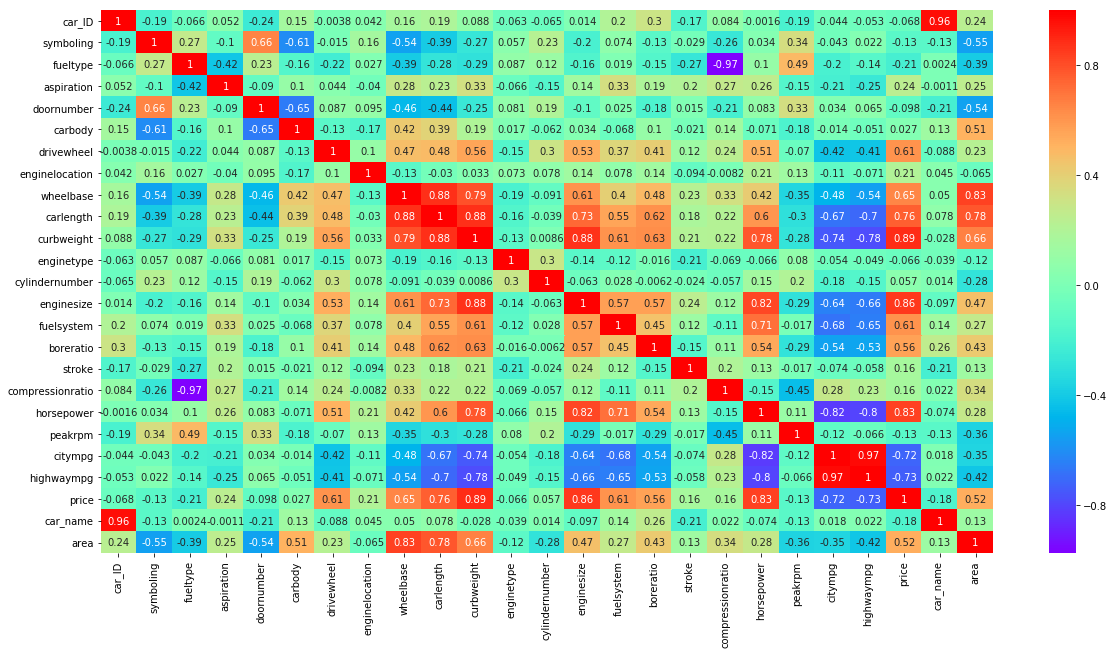

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='rainbow')
plt.show()

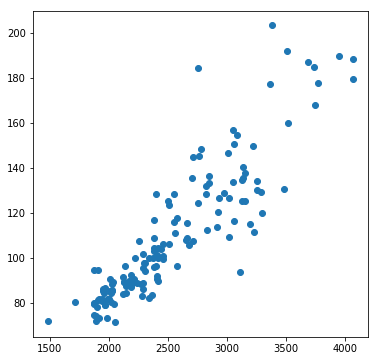

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(df_train.curbweight,df_train.price)

In [24]:
y_train=df_train.pop('price')
X_train=df_train

In [25]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train[['curbweight']])
lr=sm.OLS(y_train,X_train_lm).fit()

In [26]:
lr.params

const        -16.193608
curbweight     0.049757
dtype: float64

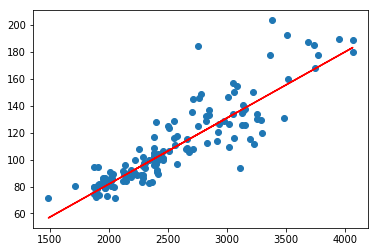

In [28]:
plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1],-16.19+0.049*X_train_lm.iloc[:,1],'r')

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     539.8
Date:                Sun, 26 May 2019   Prob (F-statistic):           4.66e-50
Time:                        11:39:41   Log-Likelihood:                -578.26
No. Observations:                 143   AIC:                             1161.
Df Residuals:                     141   BIC:                             1166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1936      5.562     -2.912      0.0

In [30]:
X_train_lm=X_train[['curbweight','enginesize']]

In [31]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const        -42.138519
curbweight     0.032844
enginesize     6.234040
dtype: float64

In [32]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     320.0
Date:                Sun, 26 May 2019   Prob (F-statistic):           6.09e-53
Time:                        11:39:51   Log-Likelihood:                -568.03
No. Observations:                 143   AIC:                             1142.
Df Residuals:                     140   BIC:                             1151.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.1385      7.633     -5.521      0.0

In [33]:
X_train_lm=X_train[['curbweight','enginesize','horsepower']]

In [34]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const        -46.226267
curbweight     0.028309
enginesize     3.369078
horsepower     4.743099
dtype: float64

In [35]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     253.1
Date:                Sun, 26 May 2019   Prob (F-statistic):           4.13e-56
Time:                        11:40:01   Log-Likelihood:                -557.41
No. Observations:                 143   AIC:                             1123.
Df Residuals:                     139   BIC:                             1135.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.2263      7.165     -6.452      0.0

In [36]:
X_train_lm=X_train[['curbweight','enginesize','horsepower','carlength']]

In [37]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const        -50.942411
curbweight     0.027377
enginesize     3.388005
horsepower     4.793825
carlength      0.036717
dtype: float64

In [38]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sun, 26 May 2019   Prob (F-statistic):           7.01e-55
Time:                        11:40:12   Log-Likelihood:                -557.39
No. Observations:                 143   AIC:                             1125.
Df Residuals:                     138   BIC:                             1140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.9424     24.145     -2.110      0.0

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,wheelbase,6201.14
9,carlength,2395.47
17,compressionratio,1497.81
23,area,1435.57
13,enginesize,671.06
21,highwaympg,619.79
20,citympg,512.50
18,horsepower,497.78
2,fueltype,444.57
10,curbweight,438.15


In [41]:

X = X_train.drop('area', 1,)

In [42]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     46.50
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.08e-48
Time:                        11:40:32   Log-Likelihood:                -526.30
No. Observations:                 143   AIC:                             1101.
Df Residuals:                     119   BIC:                             1172.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -264.0658    101.542  

In [44]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,wheelbase,5115.87
9,carlength,2274.30
17,compressionratio,1495.71
13,enginesize,621.74
21,highwaympg,616.76
20,citympg,508.79
18,horsepower,491.69
2,fueltype,442.36
15,boreratio,421.62
10,curbweight,417.97


In [45]:
X = X.drop('citympg',1)

In [46]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     48.99
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.58e-49
Time:                        11:40:49   Log-Likelihood:                -526.34
No. Observations:                 143   AIC:                             1099.
Df Residuals:                     120   BIC:                             1167.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -262.7732    101.027  

In [48]:
X = X.drop('symboling', 1)

In [49]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     51.40
Date:                Sun, 26 May 2019   Prob (F-statistic):           3.09e-50
Time:                        11:40:59   Log-Likelihood:                -526.77
No. Observations:                 143   AIC:                             1098.
Df Residuals:                     121   BIC:                             1163.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -237.1181     96.347  

In [51]:
y_train_price = lr_4.predict(X_train_lm)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

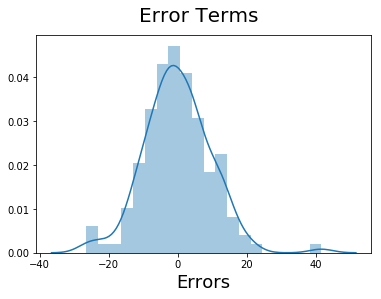

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [53]:
df_test.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name,area
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,113.322581,0.919355,0.887097,0.177419,0.435484,2.500000,1.403226,0.032258,9.960077,175.508065,...,3.381290,3.267742,3.166319,10.219745,5113.709677,24.822581,30.467742,113.323139,15.596774,3577.390484
std,59.300782,1.358620,0.319058,0.385142,0.499868,0.900819,0.526656,0.178127,0.305827,11.681726,...,0.287889,0.318261,0.574229,1.826589,470.626488,6.192338,6.728256,30.956264,7.475555,223.967719
min,4.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.305912,144.600000,...,2.540000,2.070000,2.645751,7.211103,4150.000000,14.000000,16.000000,73.477888,2.000000,3228.280000
25%,67.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,9.782638,169.350000,...,3.190000,3.150000,2.915476,8.587452,4800.000000,19.000000,25.000000,91.980913,11.000000,3376.292500
50%,117.500000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,9.891877,174.800000,...,3.390000,3.350000,3.000000,10.024938,5000.000000,24.000000,30.000000,104.270302,15.500000,3568.745000
75%,167.500000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,10.156271,185.375000,...,3.620000,3.460000,3.065942,10.908421,5475.000000,29.000000,34.000000,128.845693,22.000000,3730.650000
max,202.000000,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,10.995454,208.100000,...,3.800000,3.900000,4.795832,14.387495,6600.000000,38.000000,47.000000,213.072758,26.000000,4065.390000


Using RFE

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 12),
 ('symboling', True, 1),
 ('fueltype', True, 1),
 ('aspiration', False, 9),
 ('doornumber', True, 1),
 ('carbody', False, 2),
 ('drivewheel', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 10),
 ('curbweight', False, 13),
 ('enginetype', False, 3),
 ('cylindernumber', False, 6),
 ('enginesize', True, 1),
 ('fuelsystem', False, 4),
 ('boreratio', False, 7),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 15),
 ('citympg', False, 8),
 ('highwaympg', False, 11),
 ('car_name', False, 5),
 ('area', False, 14)]

In [57]:
col=X_train.columns[rfe.support_]
col

Index(['symboling', 'fueltype', 'doornumber', 'drivewheel', 'enginelocation',
       'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'aspiration', 'carbody', 'carlength', 'curbweight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'peakrpm',
       'citympg', 'highwaympg', 'car_name', 'area'],
      dtype='object')

Building model using Statsmodels

In [59]:
X_train_rfe=X_train[col]

In [60]:
import statsmodels.api as sm

In [61]:
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     83.10
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.62e-52
Time:                        11:41:54   Log-Likelihood:                -548.75
No. Observations:                 143   AIC:                             1119.
Df Residuals:                     132   BIC:                             1152.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -292.6046     87.274  

In [63]:
X_train_new = X_train_rfe.drop(["compressionratio"], axis = 1)

In [64]:
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     92.94
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.97e-53
Time:                        11:42:08   Log-Likelihood:                -548.81
No. Observations:                 143   AIC:                             1118.
Df Residuals:                     133   BIC:                             1147.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -270.2157     55.648     -4.

In [65]:
X_train_new=X_train_lm.drop(['doornumber'],axis=1)

In [122]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.9
Date:                Sun, 26 May 2019   Prob (F-statistic):           7.04e-54
Time:                        13:14:15   Log-Likelihood:                -549.05
No. Observations:                 143   AIC:                             1116.
Df Residuals:                     134   BIC:                             1143.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -281.3659     52.998     -5.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif=pd.DataFrame()
X=X_train_new
vif["features"]=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,2972.58
6,enginesize,4.51
8,horsepower,4.24
5,wheelbase,2.92
1,symboling,1.75
3,drivewheel,1.68
2,fueltype,1.53
4,enginelocation,1.16
7,stroke,1.16


In [125]:
y_train_price=lm.predict(X_train_lm)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Error')

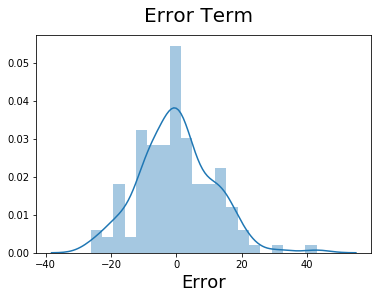

In [126]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle("Error Term",fontsize=20)
plt.xlabel("Error",fontsize=18)

Making Predictions

In [153]:
num_var=['enginesize','horsepower','symboling','wheelbase','drivewheel','fueltype','enginelocation','stroke']

In [154]:
df_test[num_var]=scaler.fit_transform(df_test[num_var])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
